Milestone-1 : Data Collection and Preprocessing

In [44]:
#importing libraries
import pandas as pd #pandas library for data analysis
import numpy as np #numpy library for numerical calculations
import matplotlib.pyplot as plt 
import seaborn as sns #matplot and seaborn for data visualization
import os

In [45]:
#makes graphs look cleaner
%matplotlib inline
sns.set_theme(style="whitegrid")

In [46]:
# Setting folder path where CSV files exist
data_path = "../Data/Raw/"

# Loading key tables
patients = pd.read_csv(data_path + "patients.csv")
admissions = pd.read_csv(data_path + "admissions.csv")
chartevents_sample = pd.read_csv(data_path + "chartevents.csv", nrows=200000)
labevents_sample = pd.read_csv(data_path + "labevents.csv", nrows=200000)

# Display the first 5 rows
patients.head(), admissions.head()


(   subject_id gender  anchor_age  anchor_year anchor_year_group         dod
 0    10014729      F          21         2125       2011 - 2013         NaN
 1    10003400      F          72         2134       2011 - 2013  2137-09-02
 2    10002428      F          80         2155       2011 - 2013         NaN
 3    10032725      F          38         2143       2011 - 2013  2143-03-30
 4    10027445      F          48         2142       2011 - 2013  2146-02-09,
    subject_id   hadm_id            admittime            dischtime  \
 0    10004235  24181354  2196-02-24 14:38:00  2196-03-04 14:02:00   
 1    10009628  25926192  2153-09-17 17:08:00  2153-09-25 13:20:00   
 2    10018081  23983182  2134-08-18 02:02:00  2134-08-23 19:35:00   
 3    10006053  22942076  2111-11-13 23:39:00  2111-11-15 17:20:00   
 4    10031404  21606243  2113-08-04 18:46:00  2113-08-06 20:57:00   
 
              deathtime admission_type admit_provider_id  \
 0                  NaN         URGENT            P03YM

In [47]:
# Checking basic info of patients table
print("PATIENTS TABLE INFO:")
patients.info()

print("\nADMISSIONS TABLE INFO:")
admissions.info()

print("\nCHARTEVENTS SAMPLE INFO:")
chartevents_sample.info()

PATIENTS TABLE INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subject_id         100 non-null    int64 
 1   gender             100 non-null    object
 2   anchor_age         100 non-null    int64 
 3   anchor_year        100 non-null    int64 
 4   anchor_year_group  100 non-null    object
 5   dod                31 non-null     object
dtypes: int64(3), object(3)
memory usage: 4.8+ KB

ADMISSIONS TABLE INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   subject_id            275 non-null    int64 
 1   hadm_id               275 non-null    int64 
 2   admittime             275 non-null    object
 3   dischtime             275 non-null    object
 4   deathtime       

In [48]:
# Checking missing values in each dataset

patients_missing = patients.isnull().sum()
admissions_missing = admissions.isnull().sum()
chartevents_missing = chartevents_sample.isnull().sum()

print("Missing values in PATIENTS table:\n", patients_missing)
print("\nMissing values in ADMISSIONS table:\n", admissions_missing)
print("\nMissing values in CHARTEVENTS sample:\n", chartevents_missing)

Missing values in PATIENTS table:
 subject_id            0
gender                0
anchor_age            0
anchor_year           0
anchor_year_group     0
dod                  69
dtype: int64

Missing values in ADMISSIONS table:
 subject_id                0
hadm_id                   0
admittime                 0
dischtime                 0
deathtime               260
admission_type            0
admit_provider_id         0
admission_location        0
discharge_location       42
insurance                 0
language                  0
marital_status           12
race                      0
edregtime                93
edouttime                93
hospital_expire_flag      0
dtype: int64

Missing values in CHARTEVENTS sample:
 subject_id           0
hadm_id              0
stay_id              0
caregiver_id      8182
charttime            0
storetime          416
itemid               0
value             6004
valuenum        118319
valueuom        147556
warning            416
dtype: int64


In [49]:
# Summary statistics for numerical features
patients.describe()

,subject_id,anchor_age,anchor_year
count,1.000000e+02,100.00000,100.000000
mean,1.001878e+07,61.75000,2148.680000
std,1.115115e+04,16.16979,25.629008
min,1.000003e+07,21.00000,2110.000000
25%,1.000889e+07,51.75000,2129.000000
50%,1.001909e+07,63.00000,2145.500000
75%,1.002550e+07,72.00000,2172.500000
max,1.004002e+07,91.00000,2201.000000


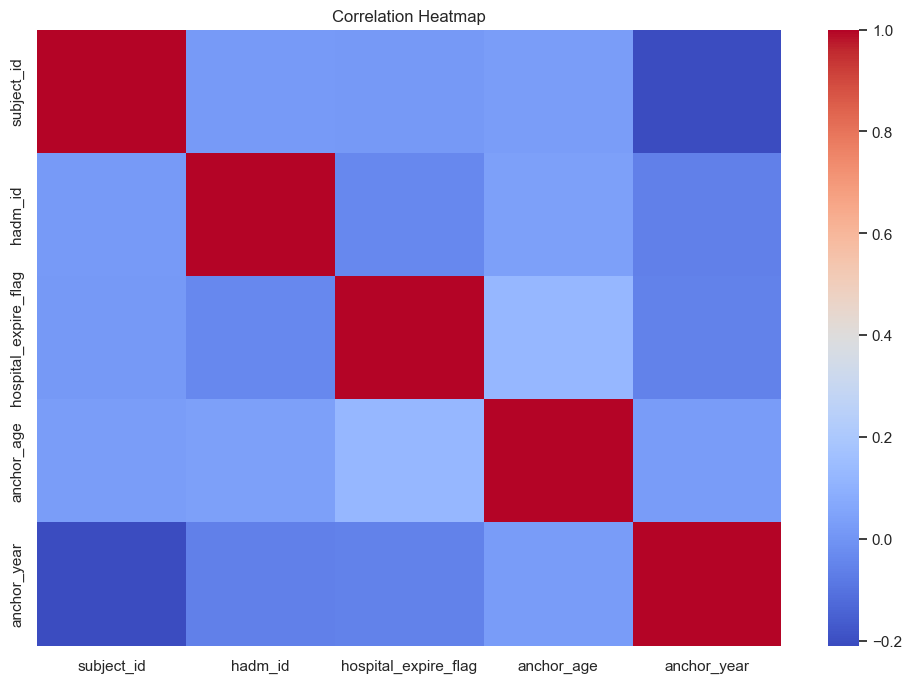

In [50]:
# Selecting only numeric columns from patients + admissions merged
merged = admissions.merge(patients, on="subject_id", how="left")

numeric_cols = merged.select_dtypes(include=['int64','float64'])

# Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(numeric_cols.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

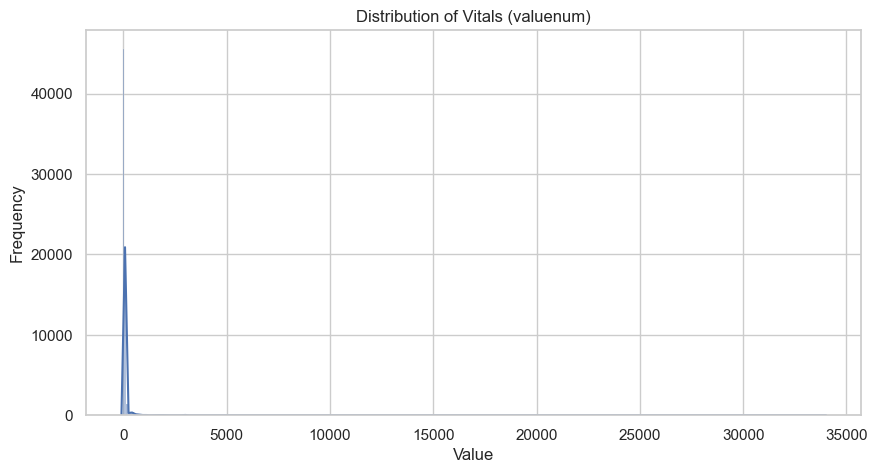

In [51]:
# Distribution of one vital measurement — assuming 'valuenum' column exists
plt.figure(figsize=(10,5))
sns.histplot(chartevents_sample['valuenum'].dropna(), kde=True)
plt.title("Distribution of Vitals (valuenum)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

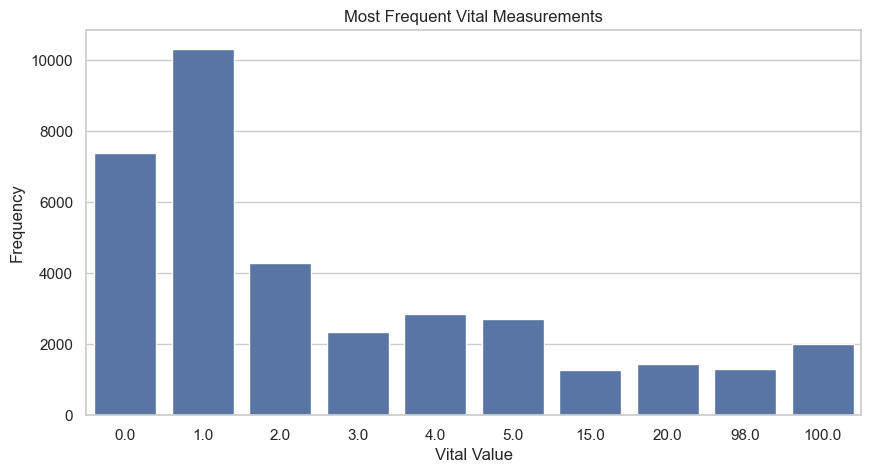

In [52]:
# Most frequent measurements (rounded)
freq = chartevents_sample['valuenum'].dropna().round().value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=freq.index, y=freq.values)
plt.title("Most Frequent Vital Measurements")
plt.xlabel("Vital Value")
plt.ylabel("Frequency")
plt.show()

In [53]:
#Imports & Working Directory
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gc, os
from pathlib import Path
%matplotlib inline

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
print("Current Working Directory:")
os.getcwd()

Current Working Directory:


'c:\\Users\\sss\\OneDrive\\Desktop\\AI NUTRICARE\\Notebooks'

In [54]:
#Auto-locate Required Files
def find_file(name_keywords):
    for root, dirs, files in os.walk(".", topdown=True):
        for f in files:
            if f.lower().endswith(".csv") and any(k in f.lower() for k in name_keywords):
                return os.path.join(root, f)
    return None

d_items_path = find_file(["d_items"])
chartevents_path = find_file(["chartevents"])

print("d_items:", d_items_path)
print("chartevents:", chartevents_path)

d_items: .\d_items.csv
chartevents: .\chartevents.csv


In [55]:
#Identify Important ICU Vitals from d_items
d_items = pd.read_csv(d_items_path)

vital_keywords = [
    "heart rate","respiratory","spo2","oxygen",
    "temperature","systolic","diastolic","blood pressure","map"
]

pattern = "|".join(vital_keywords)

possible_vitals = d_items[
    d_items["label"].str.lower().str.contains(pattern, na=False)
][["itemid","label"]].drop_duplicates()

possible_vitals.head(20)

,itemid,label
3,229875,Oxygenator visible (CH)
9,229274,Oxygenator visible (ECMO)
96,227539,ART Blood Pressure Alarm Source
208,223985,Respiratory Pattern
223,223990,Respiratory Effort
242,229091,Altered Respiratory Status NCP - Problem resolved
269,228903,Altered Respiratory Status NCP - Goal
270,228905,Altered Respiratory Status NCP - Interventions
298,228907,Altered Respiratory Status NCP - outcomes met
334,228902,Altered Respiratory Status NCP - Expected outc...


In [56]:
#Create Canonical Mapping for Vitals
mapping_rules = {
    "Heart Rate": ["heart rate","hr"],
    "Respiratory Rate": ["respiratory"],
    "SPO2": ["spo2","oxygen"],
    "Temperature (C)": ["temperature","temp"],
    "NIBP Systolic": ["systolic"],
    "NIBP Diastolic": ["diastolic"],
    "Mean Blood Pressure": ["mean blood pressure","map"]
}

canonical_map = {}

for canon, keywords in mapping_rules.items():
    for kw in keywords:
        matched = d_items[d_items["label"].str.lower().str.contains(kw, na=False)]
        for iid in matched["itemid"].unique():
            canonical_map[int(iid)] = canon

list(canonical_map.items())[:10]

[(220047, 'Heart Rate'),
 (220046, 'Heart Rate'),
 (220045, 'Heart Rate'),
 (230037, 'Heart Rate'),
 (224721, 'Heart Rate'),
 (229385, 'Heart Rate'),
 (228034, 'Heart Rate'),
 (224804, 'Heart Rate'),
 (224801, 'Heart Rate'),
 (228116, 'Heart Rate')]

In [57]:
#Extract Vital Rows from chartevents (chunked)
use_itemids = set(canonical_map.keys())
chunks = []

for chunk in pd.read_csv(chartevents_path, chunksize=200000):
    sel = chunk[chunk["itemid"].isin(use_itemids)].copy()
    if sel.empty:
        continue
    sel["value"] = pd.to_numeric(sel.get("valuenum", sel.get("value")), errors="coerce")
    sel = sel[["stay_id","charttime","itemid","value"]]
    chunks.append(sel)

vitals_raw = pd.concat(chunks, ignore_index=True)
vitals_raw["label"] = vitals_raw["itemid"].map(canonical_map)
vitals_raw["charttime"] = pd.to_datetime(vitals_raw["charttime"], errors="coerce")

vitals_raw.head()

,stay_id,charttime,itemid,value,label
0,32604416,2132-12-16,223956,NaN,Temperature (C)
1,32604416,2132-12-16,224866,NaN,Temperature (C)
2,32604416,2132-12-16,224751,52.0,Temperature (C)
3,32604416,2132-12-16,224773,NaN,Temperature (C)
4,32604416,2132-12-16,220047,55.0,Heart Rate


In [58]:
#Select Most Useful Variables (frequency based)
counts = vitals_raw["label"].value_counts()
top_labels = counts.head(6).index.tolist()
top_labels

['Respiratory Rate',
 'Temperature (C)',
 'Heart Rate',
 'NIBP Diastolic',
 'NIBP Systolic',
 'SPO2']

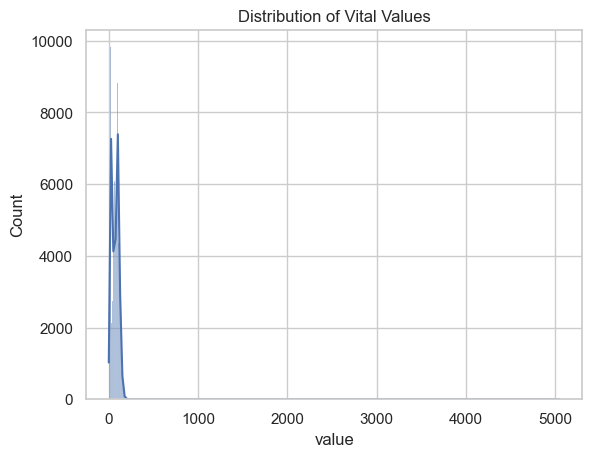

In [59]:
#Distribution (overall) & Per-Vital histograms
sns.histplot(vitals_raw["value"], kde=True)
plt.title("Distribution of Vital Values")
plt.show()

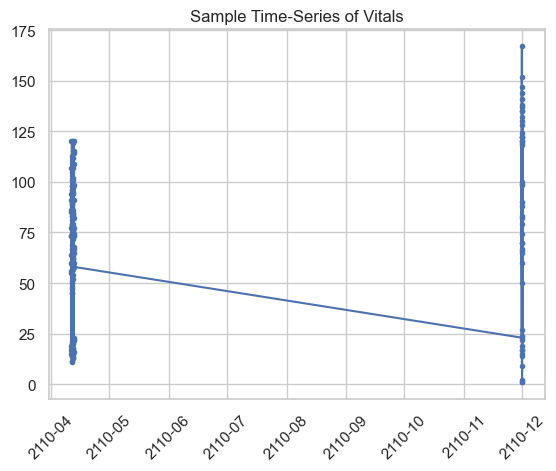

In [60]:
#Sample Time-Series Example
sample = vitals_raw.sort_values("charttime").head(300)

plt.plot(sample["charttime"], sample["value"], ".-")
plt.title("Sample Time-Series of Vitals")
plt.xticks(rotation=45)
plt.show()

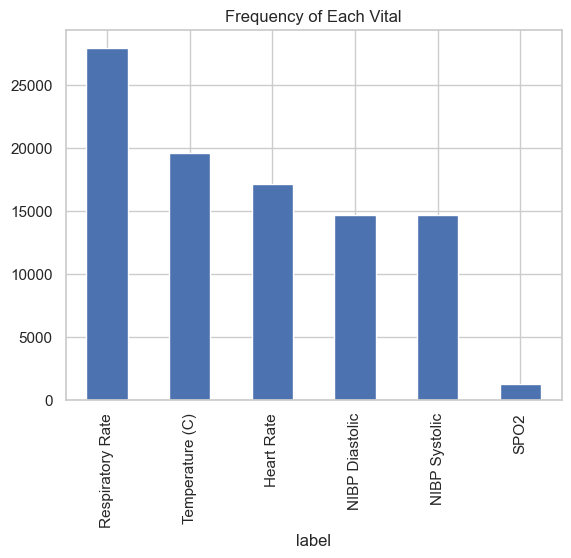

In [61]:
#Barplot Frequency of Each Vital
vitals_raw["label"].value_counts().plot(kind="bar")
plt.title("Frequency of Each Vital")
plt.show()

In [62]:
#Final Selection (filter DataFrame to top labels)
selected_vitals = vitals_raw[vitals_raw["label"].isin(top_labels)]
selected_vitals.head()

,stay_id,charttime,itemid,value,label
0,32604416,2132-12-16,223956,NaN,Temperature (C)
1,32604416,2132-12-16,224866,NaN,Temperature (C)
2,32604416,2132-12-16,224751,52.0,Temperature (C)
3,32604416,2132-12-16,224773,NaN,Temperature (C)
4,32604416,2132-12-16,220047,55.0,Heart Rate


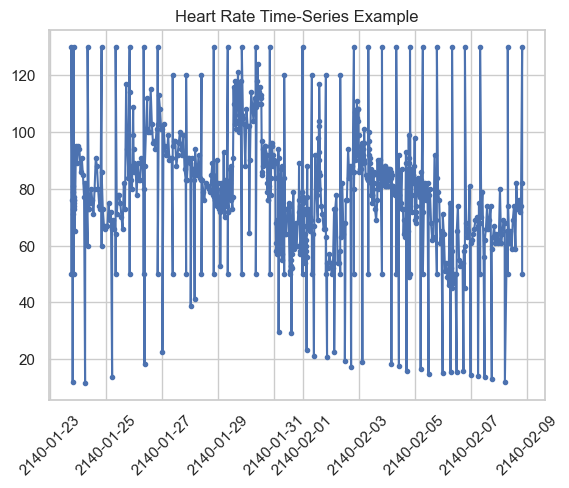

In [63]:
#Heart Rate Time-Series Example
hr = selected_vitals[selected_vitals["label"]=="Heart Rate"]
icu_example = hr["stay_id"].value_counts().idxmax()
hr_ts = hr[hr["stay_id"]==icu_example].sort_values("charttime")

plt.plot(hr_ts["charttime"], hr_ts["value"], ".-")
plt.title("Heart Rate Time-Series Example")
plt.xticks(rotation=45)
plt.show()

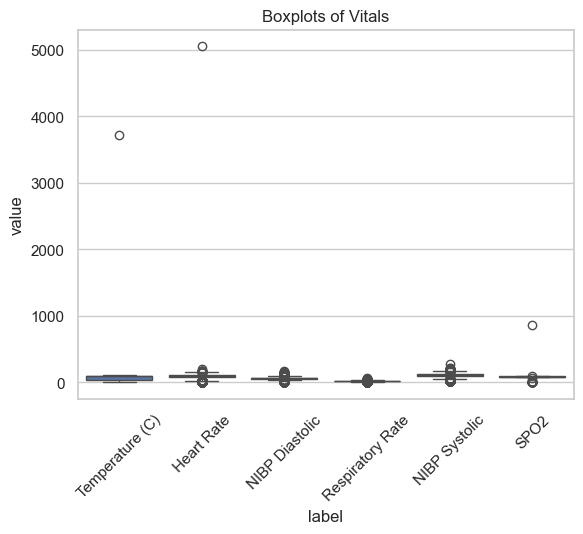

In [64]:
#Boxplot Distribution of All Vitals
sns.boxplot(x="label", y="value", data=selected_vitals)
plt.xticks(rotation=45)
plt.title("Boxplots of Vitals")
plt.show()

In [65]:
#Filter ICU Stays with Enough Data
min_points = 200
valid_stays = selected_vitals["stay_id"].value_counts()
valid_stays = valid_stays[valid_stays >= min_points].index

filtered_vitals = selected_vitals[selected_vitals["stay_id"].isin(valid_stays)]
filtered_vitals.shape

(90716, 5)

In [66]:
#Resample to Hourly Bins
filtered_vitals["charttime"] = pd.to_datetime(filtered_vitals["charttime"])

hourly = (
    filtered_vitals
    .set_index("charttime")
    .groupby(["stay_id","label"])["value"]
    .resample("1h").mean()
    .reset_index()
)

hourly.head()

C:\Users\sss\AppData\Local\Temp\ipykernel_1168\3116013395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_vitals["charttime"] = pd.to_datetime(filtered_vitals["charttime"])


,stay_id,label,charttime,value
0,30057454,Heart Rate,2171-11-14 10:00:00,90.957143
1,30057454,Heart Rate,2171-11-14 11:00:00,102.333333
2,30057454,Heart Rate,2171-11-14 12:00:00,103.000000
3,30057454,Heart Rate,2171-11-14 13:00:00,108.000000
4,30057454,Heart Rate,2171-11-14 14:00:00,105.000000


In [67]:
#Forward/Backward Fill (per stay)
hourly_wide = hourly.pivot_table(index=["charttime","stay_id"], columns="label", values="value")
hourly_wide = hourly_wide.reset_index().sort_values(["stay_id","charttime"])

cols = [c for c in hourly_wide.columns if c not in ["charttime","stay_id"]]

hourly_wide[cols] = hourly_wide.groupby("stay_id")[cols].ffill().bfill()
hourly_wide.isna().mean()

label
charttime           0.0
stay_id             0.0
Heart Rate          0.0
NIBP Diastolic      0.0
NIBP Systolic       0.0
Respiratory Rate    0.0
SPO2                0.0
Temperature (C)     0.0
dtype: float64

In [68]:
#Mean Imputation & Save Cleaned Data
hourly_wide[cols] = hourly_wide[cols].fillna(hourly_wide[cols].mean())
hourly_wide.isna().sum()

hourly_wide.to_csv("hourly_vitals_clean.csv", index=False)

In [69]:
import numpy as np
import pandas as pd

# 1) Load cleaned hourly vitals
df = pd.read_csv("hourly_vitals_clean.csv")
print("Loaded:", df.shape)
print("Columns:", df.columns.tolist())

# 2) Define the vital columns exactly as they appear in the CSV
vital_cols = [
    'Heart Rate',
    'NIBP Diastolic',
    'NIBP Systolic',
    'Respiratory Rate',
    'SPO2',
    'Temperature (C)'   
]

# 3) Sort and add hour index per stay
df = df.sort_values(['stay_id', 'charttime'])
df['hours'] = df.groupby('stay_id').cumcount()

matrices = []
stay_ids_for_y = []

# 4) For each stay, take up to 24 rows and just select the vital columns
for stay_id, g in df.groupby('stay_id'):
    g24 = g.head(24).copy()
    if g24.empty:
        continue

    # Ensure we have 24 rows by reindexing on 'hours'
    g24 = g24.set_index('hours').reindex(range(24))
    g24[vital_cols] = g24[vital_cols].ffill().bfill()

    matrices.append(g24[vital_cols].values.astype(np.float32))
    stay_ids_for_y.append(stay_id)

X = np.stack(matrices)          # (N, 24, F)
np.save("X.npy", X)

print("X.npy saved:", X.shape)
# keep order of stays in memory for y
stay_ids_for_y = np.array(stay_ids_for_y)


Loaded: (11382, 8)
Columns: ['charttime', 'stay_id', 'Heart Rate', 'NIBP Diastolic', 'NIBP Systolic', 'Respiratory Rate', 'SPO2', 'Temperature (C)']
X.npy saved: (103, 24, 6)


In [70]:
import numpy as np
import pandas as pd

# stay_ids_for_y must still be in memory 
print("Number of stays for labels:", len(stay_ids_for_y))

admissions = pd.read_csv("admissions.csv")
icustays  = pd.read_csv("icustays.csv")

# Ensure consistent types
for c in ['subject_id', 'hadm_id']:
    admissions[c] = admissions[c].astype(int)
    icustays[c]   = icustays[c].astype(int)

# Merge: stay_id -> hospital_expire_flag
merged = (
    icustays[['stay_id','subject_id','hadm_id']]
    .merge(
        admissions[['subject_id','hadm_id','hospital_expire_flag']],  # use exact column name here
        on=['subject_id','hadm_id'],
        how='left'
    )
)

flag_map = merged.set_index('stay_id')['hospital_expire_flag']  # same column as above

# Build y aligned with X
y = []
for sid in stay_ids_for_y:
    if sid in flag_map.index and pd.notna(flag_map.loc[sid]):
        y.append(int(flag_map.loc[sid]))
    else:
        y.append(0)

y = np.array(y, dtype=np.int64)
np.save("y.npy", y)

print("y.npy saved:", y.shape, "mortality rate:", y.mean())


Number of stays for labels: 103
y.npy saved: (103,) mortality rate: 0.1262135922330097
